<a href="https://colab.research.google.com/github/sisifo3/P_T_2/blob/main/knnv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2021-09-18 16-03-46.png to Screenshot from 2021-09-18 16-03-46.png


In [14]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import random
import math
from matplotlib import pyplot as plt
from numpy.linalg import norm  

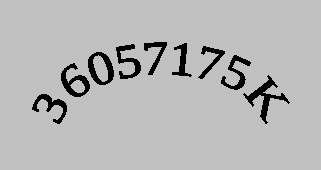

In [3]:
img = cv2.imread('/content/Screenshot from 2021-09-18 16-03-46.png', cv2.IMREAD_COLOR)

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 192, cv2.THRESH_OTSU)

A = im_gray_th_otsu

cv2_imshow(A)


In [4]:
#En esta seccion vamos a crae los primeros centrides de manera aleatoria 
def Centroides(A,C):
  t = []
  for i in range(C):
    r = [0] * 2
    a = len(A)
    b = len(A[0])
    r1 =  random.randint(1,a)
    r2 = random.randint(1,b)
    r[0] = r1
    r[1] = r2
    t.append(r)
  return  t

C = 9
Cs = Centroides(A,C)    
print(Cs) 

[[127, 222], [32, 187], [112, 170], [44, 270], [17, 59], [156, 197], [63, 274], [27, 82], [103, 45]]


In [5]:
#Cs = [[112, 57], [51, 82], [70, 292], [80, 60], [60, 200], [65, 124], [101, 184], [83, 213], [110, 287]]
#Cs = [[112, 57], [51, 82], [70, 292], [80, 60], [60, 240], [65, 124], [101, 184], [83, 213], [110, 287]]
#Cs = [[122, 97], [51, 48], [70, 292], [80, 60], [60, 240], [80, 134], [101, 184], [83, 183], [110, 287]]
#Cs = [[122, 97], [51, 48], [70, 292], [80, 60], [78, 225], [80, 134], [101, 184], [83, 183], [110, 287]]
Cs = [[122, 97], [51, 48], [70, 292], [80, 60], [78, 225], [80, 134], [101, 184], [83, 183], [125, 157]]


In [6]:
# vamos a encontrar the euclidian distance

def EcludianDistance(p1,q1,p2,q2):
  d = math.sqrt(((p1-q1)**2) + ((p2-q2)**2))
  return d

p1 = 10
q1 = 15
p2 = 50
q2 = 120

d = EcludianDistance(p1,q1,p2,q2)
print(d)

70.178344238091


In [7]:
def GAPS(A,Cs):
  #Cgps = [y,x] # i = y  # j = x   #p1 = x1
  #p2 = y1  #q1 = x2  #q2 = y2

  Cgps = [[],[],[],[],[],[],[],[],[]]

  for i in range(len(A)):
    for j in range(len(A[0])):
      if A[169-i][j] == 0:
        k = 0;Cn = 0; dlast = 1000;
        
        for c in Cs:
          p1 = c[1]; p2 = c[0]; q1 = j; q2 = i
          d = EcludianDistance(p1,q1,p2,q2)
          if d < dlast:
            dlast = d; Cn = k
          k += 1
        
        if Cn == 0:
          a = []; a.append(i); a.append(j)
          Cgps[0].append(a)
        elif Cn ==1:
          b = []; b.append(i); b.append(j)
          Cgps[1].append(b)
        elif Cn == 2:
          ci = []; ci.append(i);ci.append(j)
          Cgps[2].append(ci)
        elif Cn == 3:
          di = []; di.append(i);di.append(j)
          Cgps[3].append(di)
        elif Cn == 4:
          ei = []; ei.append(i); ei.append(j)
          Cgps[4].append(ei)
        elif Cn == 5:
          fi = []; fi.append(i); fi.append(j)
          Cgps[5].append(fi)
        elif Cn == 6:
          gi = []; gi.append(i); gi.append(j)
          Cgps[6].append(gi)
        elif Cn == 7:
          hi = []; hi.append(i); hi.append(j)
          Cgps[7].append(hi)
        elif Cn == 8:
          ji = []; ji.append(i); ji.append(j)
          Cgps[8].append(ji)

  #print(Cgps)         
  return Cgps

Cgps = GAPS(A, Cs)


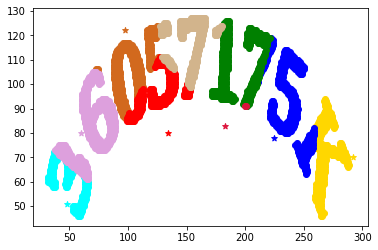

In [8]:
def plotGAPS(Cgps,Cs):
  cv0 = Cgps[0]
  cv1 = Cgps[1]
  cv21 =Cgps[2]
  cv3 = Cgps[3]
  cv4 = Cgps[4]
  cv5 = Cgps[5]
  cv6 = Cgps[6]
  cv7 = Cgps[7]
  cv8 = Cgps[8]

  x0 = []; y0 = [];x1 = []; y1 = [];x2 = []; y2 = [];x3 = []; y3 = [];x4 = []; y4 = [];x5 = []; y5 = [];x6 = []; y6 = []
  x7 = []; y7 = []; x8 = []; y8 = []

  for val in cv0:
    y0.append(val[0])
    x0.append(val[1])
  for val in cv1:
    y1.append(val[0])
    x1.append(val[1])
  for val in cv21:
    y2.append(val[0])
    x2.append(val[1])
  for val in cv3:
    y3.append(val[0])
    x3.append(val[1])
  for val in cv4:
    y4.append(val[0])
    x4.append(val[1])
  for val in cv5:
    y5.append(val[0])
    x5.append(val[1])
  for val in cv6:
    y6.append(val[0])
    x6.append(val[1])
  for val in cv7:
    y7.append(val[0])
    x7.append(val[1])
  for val in cv8:
    y8.append(val[0])
    x8.append(val[1])


  plt.scatter(x0,y0,color ='chocolate')
  plt.scatter(x1,y1,color ='cyan')
  plt.scatter(x2,y2,color ='gold')
  plt.scatter(x3,y3,color ='plum')
  plt.scatter(x4,y4,color ='blue')
  plt.scatter(x5,y5,color ='red')
  plt.scatter(x6,y6,color ='green')
  plt.scatter(x7,y7,color ='crimson')
  plt.scatter(x8,y8,color ='tan')


  plt.scatter(Cs[0][1],Cs[0][0],color ='chocolate',marker= '*')
  plt.scatter(Cs[1][1],Cs[1][0],color ='cyan',marker= '*')
  plt.scatter(Cs[2][1],Cs[2][0],color ='gold',marker= '*')
  plt.scatter(Cs[3][1],Cs[3][0],color ='plum',marker= '*')
  plt.scatter(Cs[4][1],Cs[4][0],color ='blue',marker= '*')
  plt.scatter(Cs[5][1],Cs[5][0],color ='red',marker= '*')
  plt.scatter(Cs[6][1],Cs[6][0],color ='green',marker= '*')
  plt.scatter(Cs[7][1],Cs[7][0],color ='crimson',marker= '*')
  plt.scatter(Cs[8][1],Cs[8][0],color ='tan',marker= '*')

  #plt.scatter(xc,yc,color ='coral')

  plt.show()



plotGAPS(Cgps,Cs)

In [9]:
def upcentroides(Cgps):
  Cs =[]

  for cv0 in Cgps:
      
    c0 = [0,0]; a =[]; b =[];
    
    for v in cv0:
      a.append(v[0])
      b.append(v[1])

    n = len(a)
    c0[0] = sum(a)/n
    c0[1] = sum(b)/n
    
    Cs.append(c0)


  return Cs

Cs = upcentroides(Cgps)  

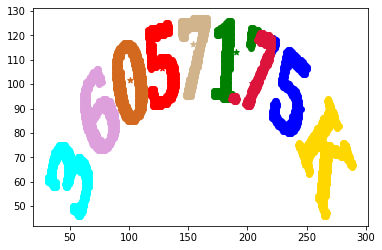

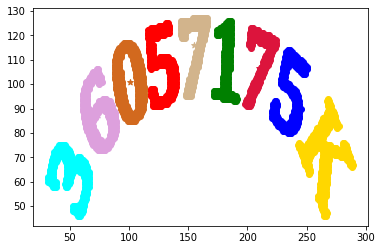

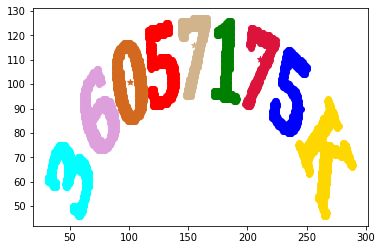

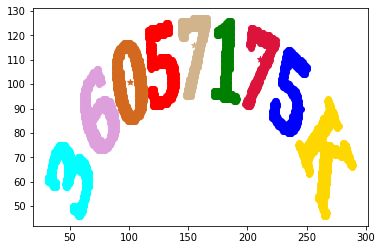

In [11]:
for i in range(4):
  Cgps = GAPS(A,Cs)
  plotGAPS(Cgps,Cs)
  Cs = upcentroides(Cgps)  
 

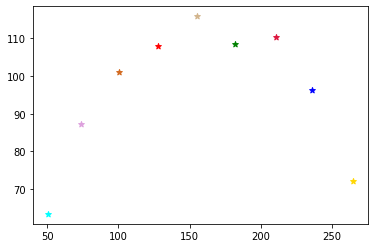

In [13]:

plt.scatter(Cs[0][1],Cs[0][0],color ='chocolate',marker= '*')
plt.scatter(Cs[1][1],Cs[1][0],color ='cyan',marker= '*')
plt.scatter(Cs[2][1],Cs[2][0],color ='gold',marker= '*')
plt.scatter(Cs[3][1],Cs[3][0],color ='plum',marker= '*')
plt.scatter(Cs[4][1],Cs[4][0],color ='blue',marker= '*')
plt.scatter(Cs[5][1],Cs[5][0],color ='red',marker= '*')
plt.scatter(Cs[6][1],Cs[6][0],color ='green',marker= '*')
plt.scatter(Cs[7][1],Cs[7][0],color ='crimson',marker= '*')
plt.scatter(Cs[8][1],Cs[8][0],color ='tan',marker= '*')


In [18]:
def getAngles(Cs):
  # en esta parte del código buscamos resolver la ecuación que nos ayuda a hacer el moviemiento de la normal de cada punto.

  # [[cos(pi\2) , -sin(pi/2)] , [sin(pi/2, cos(pi/2))]] * (1/2) * ((pi - pil)/||(pi - pil))|| + (pin - pil)/||(pin - pi)||2
  # (r) * (1/2) * ((a/b) + (c/d))

  r1 = [[0,-1],[1,0]]
  Angles = []
  #p = [[100.95103092783505, 100.51030927835052], [63.43452380952381, 50.916666666666664],[72.05325443786982, 264.6686390532544], [87.40920716112532, 73.8542199488491],[96.30513595166163, 236.06344410876133],  [107.93823529411765, 127.71470588235294],[108.56349206349206, 181.79761904761904],[110.31174089068826, 210.78542510121457], [115.8508064516129, 155.16129032258064]]
  #p = [[100.95103092783505, 100.51030927835052], [63.43452380952381, 50.916666666666664], [72.05325443786982, 264.6686390532544], [87.40920716112532, 73.8542199488491], [97.16763005780346, 235.47687861271677], [107.93823529411765, 127.71470588235294], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [115.8508064516129, 155.16129032258064]]
  p = Cs
  pi = p[7]
  pil = p[6]
  pin = p[8]
  lenp = len(p)

  for i in range(lenp-2):
    pi = p[i+1]
    pil = p[i]
    pin = p[i+2]
    a = np.subtract(pi,pil)
    b = norm(a,2)
    c = np.subtract(pin,pi)
    d = norm(c,2) 
    ab = np.divide(a,b)
    cd = np.divide(c,d) 
    abcd = np.add(ab,cd)
    r2 = (1/2) * abcd
  
    r = r1 * r2
    x = r[0][1]
    y = r[1][0]
    t = math.atan(y/x)
    td = math.degrees(t)
    #print(td)
    Angles.append(td)
  
  return Angles

Angles = getAngles(Cs)  
print(Angles)

[70.29215420662553, -88.85398563627093, -89.26903864334288, -88.50543889147977, -87.26708042983451, -2.056844067552485, -88.88226799686281]
